In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
df=pd.read_csv("/content/exp5.csv")

In [88]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
df=df.dropna()

In [92]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [93]:
df.corr()["Survived"]

PassengerId    0.148495
Survived       1.000000
Pclass        -0.034542
Age           -0.254085
SibSp          0.106346
Parch          0.023582
Fare           0.134241
Name: Survived, dtype: float64

In [94]:
df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Age'],axis="columns")

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
df["Sex"].unique()

array(['female', 'male'], dtype=object)

In [97]:
le=LabelEncoder()
df.Sex = le.fit_transform(df.Sex)

In [98]:
df

,Survived,Pclass,Sex,Fare
1,1,1,0,71.2833
3,1,1,0,53.1000
6,0,1,1,51.8625
10,1,3,0,16.7000
11,1,1,0,26.5500
...,...,...,...,...
871,1,1,0,52.5542
872,0,1,1,5.0000
879,1,1,0,83.1583
887,1,1,0,30.0000


In [99]:
x=df[["Pclass","Sex","Fare"]]
y=df["Survived"]

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)

In [102]:
print(x_train)
print(y_train)

     Pclass  Sex      Fare
245       1    1   90.0000
177       1    0   28.7125
297       1    0  151.5500
66        2    0   10.5000
452       1    1   27.7500
..      ...  ...       ...
275       1    0   77.9583
27        1    1  263.0000
625       1    1   32.3208
701       1    1   26.2875
3         1    0   53.1000

[128 rows x 3 columns]
245    0
177    0
297    0
66     1
452    0
      ..
275    1
27     0
625    0
701    1
3      1
Name: Survived, Length: 128, dtype: int64


In [103]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear')  
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [104]:
#Diff support vector attribute
classifier.support_vectors_

array([[  1.    ,   1.    ,  90.    ],
       [  1.    ,   0.    ,  28.7125],
       [  1.    ,   0.    , 151.55  ],
       [  1.    ,   1.    ,  27.75  ],
       [  1.    ,   1.    ,  79.65  ],
       [  1.    ,   1.    , 106.425 ],
       [  1.    ,   1.    ,  26.55  ],
       [  1.    ,   1.    ,  52.    ],
       [  1.    ,   1.    ,  38.5   ],
       [  1.    ,   1.    , 247.5208],
       [  1.    ,   1.    ,  79.2   ],
       [  1.    ,   1.    , 211.5   ],
       [  1.    ,   1.    ,   0.    ],
       [  1.    ,   1.    ,  79.2   ],
       [  1.    ,   1.    , 153.4625],
       [  1.    ,   1.    ,  33.5   ],
       [  1.    ,   1.    ,   5.    ],
       [  3.    ,   0.    ,  10.4625],
       [  1.    ,   1.    , 263.    ],
       [  1.    ,   1.    ,  25.5875],
       [  1.    ,   1.    ,  71.    ],
       [  1.    ,   1.    ,   0.    ],
       [  1.    ,   1.    ,  35.5   ],
       [  1.    ,   1.    ,  29.7   ],
       [  1.    ,   1.    ,  29.7   ],
       [  2.    ,   0.   

In [105]:
classifier.n_support_

array([37, 41], dtype=int32)

In [106]:
classifier.support_

array([  0,   1,   2,   4,   7,   8,  16,  21,  23,  25,  27,  29,  31,
        33,  39,  41,  42,  49,  50,  52,  57,  65,  69,  70,  77,  86,
        87,  94,  97, 102, 107, 113, 114, 116, 118, 124, 125,   6,   9,
        10,  11,  13,  14,  17,  19,  20,  22,  24,  26,  30,  37,  38,
        43,  45,  46,  51,  54,  59,  61,  66,  67,  71,  76,  78,  81,
        83,  95,  96,  98, 100, 103, 106, 109, 110, 111, 119, 126, 127],
      dtype=int32)

In [107]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
print(y_pred)

[1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0]


In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , plot_confusion_matrix

In [109]:
ac= accuracy_score(y_pred, y_test)
print(ac)

0.7636363636363637


In [110]:
cr= classification_report(y_pred,y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        28
           1       0.68      1.00      0.81        27

    accuracy                           0.76        55
   macro avg       0.84      0.77      0.75        55
weighted avg       0.84      0.76      0.75        55



In [111]:
confusion_matrix(y_pred, y_test)

array([[15, 13],
       [ 0, 27]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


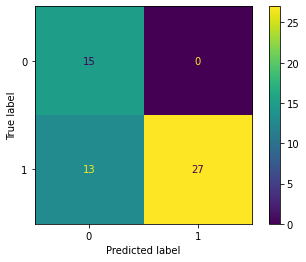

In [112]:
plot_confusion_matrix(classifier, x_test, y_test)